### Importación de datos



In [ ]:
import pandas as pd
import locale
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [ ]:
#Generamos los totales de cada tienda.
total_tienda1= tienda1 ['Precio'].sum()
total_tienda2=tienda2 ['Precio'].sum()
total_tienda3= tienda3 ['Precio'].sum()
total_tienda4= tienda4['Precio'].sum()

# Almacenamos en un diccionario los totales de cada tienda, para luego imprimirlos en un for.
ingresos= {'Tienda 1':total_tienda1,'Tienda 2': total_tienda2,'Tienda 3':total_tienda3,'Tienda 4':total_tienda4}

#LUEGO DE CALCULAR Y ALMACENAR LOS TOTAL DE CADA TIENDA PROCEDO A IMPRIMIR LOS RESULTADOS DE DIFERENTES MANERAS.

# con end="\n\n" dejo un espacio para seguir con el siguiente print
print("Diferentes tipos de impresión:",end="\n\n")

#Imprimimos los totaltes de cada tienda.
for tienda, totales in ingresos.items():
    print(f"{tienda}: ${totales:,.2f}")

# con print() dejo un espacio entre cada print
print()

#Voy a crear un dataFrame para que la info se vea mas organizada
df_ingresos = pd.DataFrame(list(ingresos.items()), columns=['Descripción', 'Total Ingresos'])

print(df_ingresos,end="\n\n")

#Luego utilizo un lambda para cambiar el total ingreso en formato moneda (columnna formateada como moneda)
df_ingresos['Total Ingresos'] = df_ingresos['Total Ingresos'].apply(lambda x: f"${x:,.2f}")

df_ingresos.head()

Diferentes tipos de impresión:

Tienda 1: $1,150,880,400.00
Tienda 2: $1,116,343,500.00
Tienda 3: $1,098,019,600.00
Tienda 4: $1,038,375,700.00

  Descripción  Total Ingresos
0    Tienda 1    1.150880e+09
1    Tienda 2    1.116344e+09
2    Tienda 3    1.098020e+09
3    Tienda 4    1.038376e+09



,Descripción,Total Ingresos
0,Tienda 1,"$1,150,880,400.00"
1,Tienda 2,"$1,116,343,500.00"
2,Tienda 3,"$1,098,019,600.00"
3,Tienda 4,"$1,038,375,700.00"


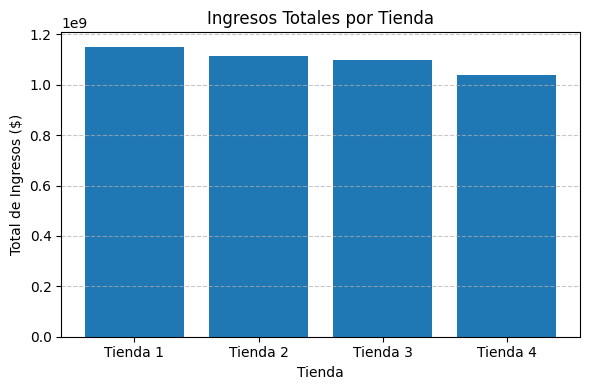

In [ ]:
# --- Crear el gráfico de barras ---
plt.figure(figsize=(6,4))  # Tamaño del gráfico
plt.bar(
    df_ingresos['Descripción'],
    df_ingresos['Total Ingresos'].str.replace(r'[\$,]', '', regex=True).astype(float)
)

# --- Personalizar ---
plt.title('Ingresos Totales por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Total de Ingresos ($)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# --- Mostrar gráfico ---
plt.show()

# 2. Ventas por categoría

In [ ]:
  # Agrupa por categoría y cuenta la cantidad de productos vendidos.
  # Retorna un DataFrame con el resultado.

def productos_por_categoria(df_tienda, nom_tienda):

    resumen = df_tienda.groupby('Categoría del Producto').size().reset_index(name='Cantidad Vendida')
    resumen = resumen.sort_values(by='Cantidad Vendida', ascending=False)
    resumen.insert(0, 'Tienda', nom_tienda)
    return resumen

# Aplicamos la función a cada tienda
resumen_t1 = productos_por_categoria(tienda1, 'Tienda 1')
resumen_t2 = productos_por_categoria(tienda2, 'Tienda 2')
resumen_t3 = productos_por_categoria(tienda3, 'Tienda 3')
resumen_t4 = productos_por_categoria(tienda4, 'Tienda 4')

# Unimos todos los resultados en un solo DataFrame
resumen_global = pd.concat([resumen_t1, resumen_t2, resumen_t3, resumen_t4])

# Mostramos el resultado
print("\nCantidad de productos vendidos por categoría en cada tienda:\n")
print(resumen_global)

# Si quieres ver solo las 3 categorías más populares por tienda:
top3_categorias = resumen_global.groupby('Tienda').head(3)
print("\nTop 3 categorías más vendidas por tienda:\n")
print(top3_categorias)



Cantidad de productos vendidos por categoría en cada tienda:

     Tienda   Categoría del Producto  Cantidad Vendida
7  Tienda 1                  Muebles               465
3  Tienda 1             Electrónicos               448
5  Tienda 1                 Juguetes               324
2  Tienda 1        Electrodomésticos               312
1  Tienda 1     Deportes y diversión               284
4  Tienda 1   Instrumentos musicales               182
6  Tienda 1                   Libros               173
0  Tienda 1  Artículos para el hogar               171
7  Tienda 2                  Muebles               442
3  Tienda 2             Electrónicos               422
5  Tienda 2                 Juguetes               313
2  Tienda 2        Electrodomésticos               305
1  Tienda 2     Deportes y diversión               275
4  Tienda 2   Instrumentos musicales               224
6  Tienda 2                   Libros               197
0  Tienda 2  Artículos para el hogar               181
7 

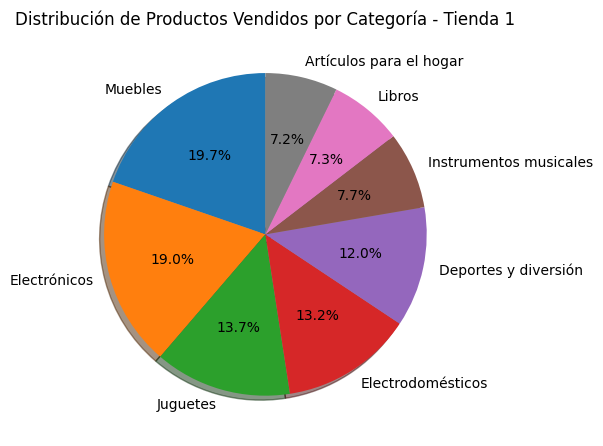

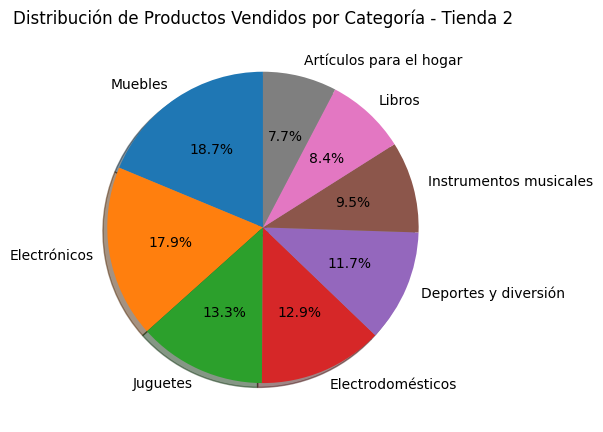

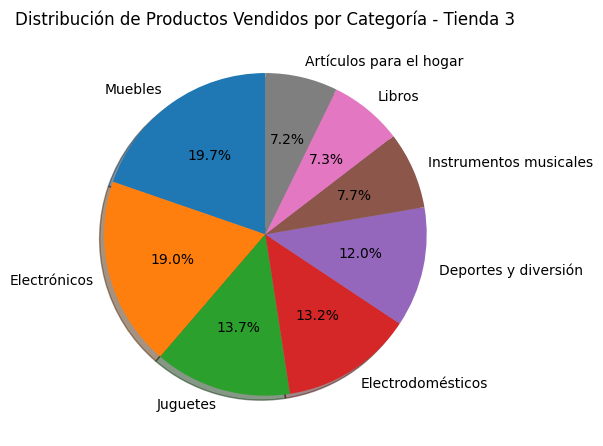

In [ ]:
#Gráfico para Tienda 1
resumen_t1 = productos_por_categoria(tienda1, 'Tienda 1')

plt.figure(figsize=(6,6))
plt.pie(
    resumen_t1['Cantidad Vendida'],
    labels=resumen_t1['Categoría del Producto'],
    autopct='%1.1f%%',     # Muestra porcentaje con un decimal
    startangle=90,         # Comienza desde arriba
    shadow=True            # Le da un efecto 3D suave
)
plt.title('Distribución de Productos Vendidos por Categoría - Tienda 1')
plt.tight_layout()
plt.show()

#Gráfico para Tienda 2
resumen_t1 = productos_por_categoria(tienda2, 'Tienda 2')

plt.figure(figsize=(6,6))
plt.pie(
    resumen_t1['Cantidad Vendida'],
    labels=resumen_t1['Categoría del Producto'],
    autopct='%1.1f%%',     # Muestra porcentaje con un decimal
    startangle=90,         # Comienza desde arriba
    shadow=True            # Le da un efecto 3D suave
)
plt.title('Distribución de Productos Vendidos por Categoría - Tienda 2')
plt.tight_layout()
plt.show()

#Gráfico para Tienda 3
resumen_t1 = productos_por_categoria(tienda1, 'Tienda 3')

plt.figure(figsize=(6,6))
plt.pie(
    resumen_t1['Cantidad Vendida'],
    labels=resumen_t1['Categoría del Producto'],
    autopct='%1.1f%%',     # Muestra porcentaje con un decimal
    startangle=90,         # Comienza desde arriba
    shadow=True            # Le da un efecto 3D suave
)
plt.title('Distribución de Productos Vendidos por Categoría - Tienda 3')
plt.tight_layout()
plt.show()

#Gráfico para Tienda 4
resumen_t1 = productos_por_categoria(tienda1, 'Tienda 4')

plt.figure(figsize=(6,6))
plt.pie(
    resumen_t1['Cantidad Vendida'],
    labels=resumen_t1['Categoría del Producto'],
    autopct='%1.1f%%',     # Muestra porcentaje con un decimal
    startangle=90,         # Comienza desde arriba
    shadow=True            # Le da un efecto 3D suave
)
plt.title('Distribución de Productos Vendidos por Categoría - Tienda 4')
plt.tight_layout()
plt.show()

# 3. Calificación promedio de la tienda


In [ ]:
# --- Calcular promedio de calificaciones por tienda ---
#    Calcula el promedio de la columna 'Calificación' para una tienda.
#    Retorna un diccionario con el nombre de la tienda y su calificación promedio, me diante la función prom_calificaciones.
def prom_calificaciones(df_tienda, nom_tienda):
    promedio = df_tienda['Calificación'].mean()
    return {'Tienda': nom_tienda, 'Promedio Calificación': promedio}

# Aplicamos la función a cada tienda
promedios = [
    prom_calificaciones(tienda1, 'Tienda 1'),
    prom_calificaciones(tienda2, 'Tienda 2'),
    prom_calificaciones(tienda3, 'Tienda 3'),
    prom_calificaciones(tienda4, 'Tienda 4')
]

# Convertimos el resultado a DataFrame
df_calificaciones = pd.DataFrame(promedios)

# Formateamos a 2 decimales con la funcion round ()
df_calificaciones['Promedio Calificación'] = df_calificaciones['Promedio Calificación'].round(2)

#En orden Descendente
df_calificaciones = df_calificaciones.sort_values(by='Promedio Calificación', ascending=False)

# Mostramos el resumen
print("\nPromedio de calificaciones por tienda, ordenado descendentemente:\n")
print(df_calificaciones)


Promedio de calificaciones por tienda, ordenado descendentemente:

     Tienda  Promedio Calificación
2  Tienda 3                   4.05
1  Tienda 2                   4.04
3  Tienda 4                   4.00
0  Tienda 1                   3.98


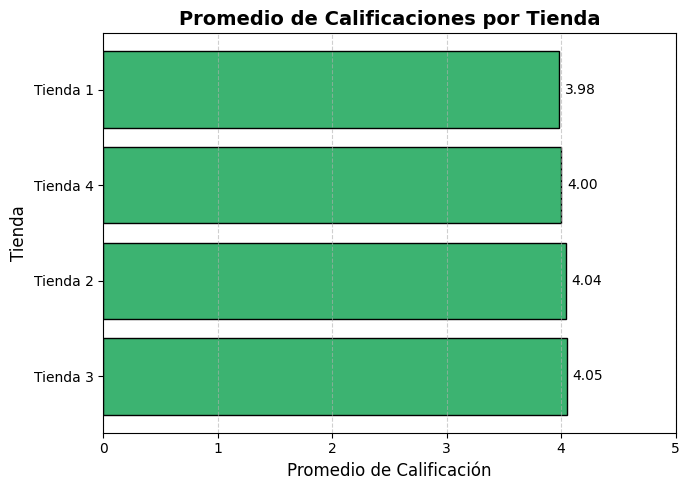

In [ ]:

# Crear la figura
plt.figure(figsize=(7,5))

# Crear las barras horizontales
plt.barh(
    df_calificaciones['Tienda'],
    df_calificaciones['Promedio Calificación'],
    color='mediumseagreen',   # color agradable
    edgecolor='black'
)

# Título y etiquetas
plt.title('Promedio de Calificaciones por Tienda', fontsize=14, fontweight='bold')
plt.xlabel('Promedio de Calificación', fontsize=12)
plt.ylabel('Tienda', fontsize=12)

# Mostrar los valores al final de cada barra
for i, valor in enumerate(df_calificaciones['Promedio Calificación']):
    plt.text(valor + 0.05, i, f'{valor:.2f}', va='center', fontsize=10)

# Ajustes visuales
plt.xlim(0, 5)  # si las calificaciones van de 1 a 5
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# 4. Productos más y menos vendidos

In [ ]:

  # Agrupa por producto y calcula cuántas unidades se vendieron de cada uno.
  # Retorna un DataFrame ordenado de mayor a menor venta.

# --- Función de análisis por tienda ---
def analisis_productos(df_tienda, nom_tienda):

    resumen = df_tienda.groupby('Producto').size().reset_index(name='Ventas')
    resumen = resumen.sort_values(by='Ventas', ascending=False)
    resumen.insert(0, 'Tienda', nom_tienda)
    return resumen

# --- Aplicar análisis a las 4 tiendas ---
resumen_t1 = analisis_productos(tienda1, 'Tienda 1')
resumen_t2 = analisis_productos(tienda2, 'Tienda 2')
resumen_t3 = analisis_productos(tienda3, 'Tienda 3')
resumen_t4 = analisis_productos(tienda4, 'Tienda 4')

# --- Combinar resultados ---
resumen_global = pd.concat([resumen_t1, resumen_t2, resumen_t3, resumen_t4])

# --- Identificar el producto más y menos vendido de cada tienda ---
def masmenosvendido(df, nombre_tienda):
    #Como antes ordenamos con ascending=False, la primera fila es el producto más vendido, entonces top devuelve la fila completa
    top = df.iloc[0]
    #representamos el producto menos vendido df.iloc[-1] (porque el DataFrame está en orden descendente).
    bottom = df.iloc[-1]
    #Diccionario con los resultados.
    return {
        'Tienda': nombre_tienda,
        'Más vendido': top['Producto'],
        'Ventas Más Vendido': top['Ventas'],
        'Menos vendido': bottom['Producto'],
        'Ventas Menos Vendido': bottom['Ventas']
    }

resultados = [
    masmenosvendido(resumen_t1, 'Tienda 1'),
    masmenosvendido(resumen_t2, 'Tienda 2'),
    masmenosvendido(resumen_t3, 'Tienda 3'),
    masmenosvendido(resumen_t4, 'Tienda 4')
]

df_resultados = pd.DataFrame(resultados)


print("\n🛍️ Productos más y menos vendidos por tienda:\n")
print(df_resultados)


🛍️ Productos más y menos vendidos por tienda:

     Tienda                Más vendido  Ventas Más Vendido  \
0  Tienda 1                    Armario                  60   
1  Tienda 2  Iniciando en programación                  65   
2  Tienda 3              Kit de bancas                  57   
3  Tienda 4                   Cama box                  62   

               Menos vendido  Ventas Menos Vendido  
0  Auriculares con micrófono                    33  
1              Juego de mesa                    32  
2    Bloques de construcción                    35  
3         Guitarra eléctrica                    33  


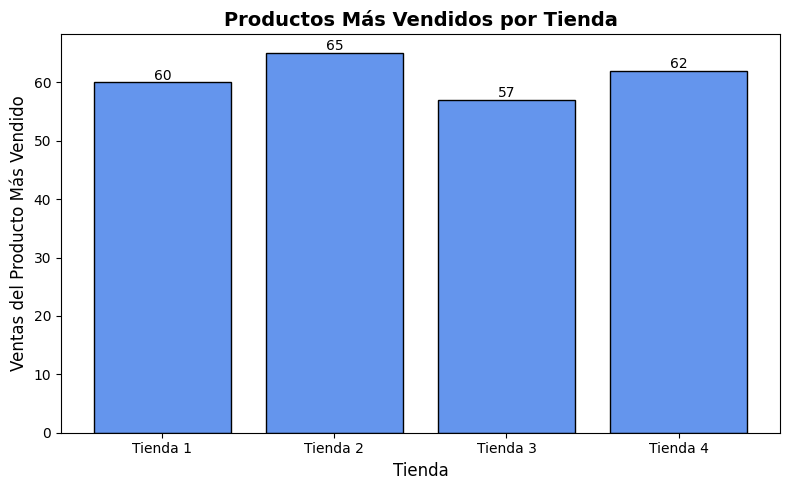

In [ ]:
# Gráfico de barras: productos más vendidos
plt.figure(figsize=(8,5))
plt.bar(
    df_resultados['Tienda'],
    df_resultados['Ventas Más Vendido'],
    color='cornflowerblue',
    edgecolor='black'
)

# Títulos y etiquetas
plt.title('Productos Más Vendidos por Tienda', fontsize=14, fontweight='bold')
plt.xlabel('Tienda', fontsize=12)
plt.ylabel('Ventas del Producto Más Vendido', fontsize=12)

# Mostrar los valores sobre cada barra
for i, valor in enumerate(df_resultados['Ventas Más Vendido']):
    plt.text(i, valor + 0.5, f'{valor}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

# 5. Envío promedio por tienda

In [ ]:
# Configurar formato moneda local
locale.setlocale(locale.LC_ALL, '')

# --- Calcular el promedio del costo de envío en cada tienda en un diccionario
prom_envio = {
    'Tienda 1': tienda1['Costo de envío'].mean(),
    'Tienda 2': tienda2['Costo de envío'].mean(),
    'Tienda 3': tienda3['Costo de envío'].mean(),
    'Tienda 4': tienda4['Costo de envío'].mean()
}

# Convertir resultados a DataFrame
df_costoenvios = pd.DataFrame(list(prom_envio.items()), columns=['Tienda', 'Costo Envío Promedio'])

# --- Ordenar de mayor a menor (descendente) ---
df_envios = df_costoenvios.sort_values(by='Costo Envío Promedio', ascending=False).reset_index(drop=True)

# Dar formato de moneda
df_costoenvios['Costo Envío Promedio'] = df_costoenvios['Costo Envío Promedio'].apply(lambda x: locale.currency(x, grouping=True))

# --- Mostrar resultados centrados ---
pd.set_option('display.colheader_justify', 'center')

print("\n🚚 Costo de envío promedio por tienda (pago por el cliente):\n")
print(df_costoenvios.to_string(index=False))


🚚 Costo de envío promedio por tienda (pago por el cliente):

 Tienda  Costo Envío Promedio
Tienda 1      $26,018.61     
Tienda 2      $25,216.24     
Tienda 3      $24,805.68     
Tienda 4      $23,459.46     


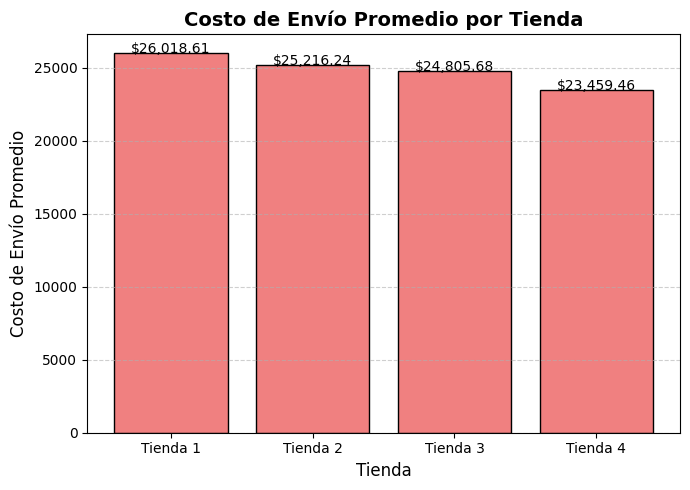

In [ ]:

# Usamos el DataFrame ordenado (sin formato moneda para graficar)
plt.figure(figsize=(7,5))
plt.bar(
    df_envios['Tienda'],
    df_envios['Costo Envío Promedio'],
    color='lightcoral',
    edgecolor='black'
)

# Títulos y etiquetas
plt.title('Costo de Envío Promedio por Tienda', fontsize=14, fontweight='bold')
plt.xlabel('Tienda', fontsize=12)
plt.ylabel('Costo de Envío Promedio', fontsize=12)

# Mostrar los valores sobre cada barra, formateados como moneda
for i, valor in enumerate(df_envios['Costo Envío Promedio']):
    plt.text(i, valor + 0.5, f"${valor:,.2f}", ha='center', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Informe final:

1. En el total de ingresos la tienda 1 cuenta con un ingreso de $ 1,150,880.400 seguido de la tienda 2 con $ 1,116,343,500, la tienda 3 con $ 1,098,019,600 y en cuarto lugar la tienda 4 con $ 1,038,375,700.

2. la categoría muebles es la mas vendido en la tienda 1 con 465 ventas
Para la tienda 2 la categoría muebles ocupa el primer lugar con 442
Para la tienda 3 la categoría mubles ocupa el primer lugar con 499 ventas
Para la tienda 4 la categoría muebles tiene 480 ventas.

3. la calificación mas baja esta en la tienda 1 con una calificación 4.0 por parte de los clientes y la mas alta es la tienda 3 con 4.05 seguida dela tienda 2 con 4.04, la tienda 4 también tiene una calificación de 4.0.

4. Dentro de los costos de envió promedio la tienda 4 es la que menos costo tiene con $ 23,459.46. aunque cave resalta que con respecto al costo de envió promedio mas alto que es la tienda 1 con $ 26,018.61 solo hay una diferencia de $ 2.559.

Basados en los datos Obtenidos, se recomienda vender la tienda 4, su ingreso es el menor, su calificación es una de las mas bajas y aunque el costo de envió promedio es el menor no es significativo, dentro de los productos mas vendidos se encuentra en penúltimo lugar.



